In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Data Generation

observations = 1000

xs = np.random.uniform(-10, 10, (observations, 1))
zs = np.random.uniform(-10, 10, (observations, 1))

generated_inputs = np.column_stack((xs, zs))

noise = np.random.uniform(-1, 1, (observations, 1))

generated_targets = 2*xs - 3*zs + 5 + noise

np.savez('TF_intro', inputs = generated_inputs, targets = generated_targets)

In [4]:
training_data = np.load('TF_intro.npz')

In [7]:
# 2 inputs: xs, zs
input_size = 2
output_size = 1

model = tf.keras.Sequential([
                                tf.keras.layers.Dense(output_size)
                            ])

model.compile(optimizer = 'sgd', loss = 'mean_squared_error')

# Epochs is the the number of iterations, verbose 0 means silents

model.fit(training_data['inputs'], training_data['targets'], epochs = 100, verbose = 2)

Epoch 1/100
32/32 - 0s - loss: 26.2084
Epoch 2/100
32/32 - 0s - loss: 4.5141
Epoch 3/100
32/32 - 0s - loss: 1.5407
Epoch 4/100
32/32 - 0s - loss: 0.6685
Epoch 5/100
32/32 - 0s - loss: 0.4415
Epoch 6/100
32/32 - 0s - loss: 0.3834
Epoch 7/100
32/32 - 0s - loss: 0.3544
Epoch 8/100
32/32 - 0s - loss: 0.3550
Epoch 9/100
32/32 - 0s - loss: 0.3503
Epoch 10/100
32/32 - 0s - loss: 0.3611
Epoch 11/100
32/32 - 0s - loss: 0.3557
Epoch 12/100
32/32 - 0s - loss: 0.3492
Epoch 13/100
32/32 - 0s - loss: 0.3521
Epoch 14/100
32/32 - 0s - loss: 0.3551
Epoch 15/100
32/32 - 0s - loss: 0.3477
Epoch 16/100
32/32 - 0s - loss: 0.3484
Epoch 17/100
32/32 - 0s - loss: 0.3555
Epoch 18/100
32/32 - 0s - loss: 0.3495
Epoch 19/100
32/32 - 0s - loss: 0.3578
Epoch 20/100
32/32 - 0s - loss: 0.3661
Epoch 21/100
32/32 - 0s - loss: 0.3558
Epoch 22/100
32/32 - 0s - loss: 0.3487
Epoch 23/100
32/32 - 0s - loss: 0.3549
Epoch 24/100
32/32 - 0s - loss: 0.3513
Epoch 25/100
32/32 - 0s - loss: 0.3497
Epoch 26/100
32/32 - 0s - loss: 0

In [8]:
model.layers[0].get_weights()

[array([[ 2.0021048],
        [-3.0012133]], dtype=float32),
 array([5.0078306], dtype=float32)]

In [10]:
model.predict_on_batch(training_data['inputs']).round(1)

array([[ -4.4],
       [  1.9],
       [ 21.4],
       [  0.5],
       [ 51.1],
       [ 31.7],
       [ 15.9],
       [ 18.9],
       [ 46.7],
       [ -6.3],
       [ 21.9],
       [-35.9],
       [ 28.1],
       [-23.6],
       [ 33.4],
       [-15.2],
       [-20. ],
       [ 27.3],
       [  6. ],
       [-11.3],
       [ 51.1],
       [-15.4],
       [ 23.6],
       [ 30.7],
       [ 40.7],
       [ 25.7],
       [ 17. ],
       [-20.5],
       [ 16.9],
       [ -5.3],
       [ 23.5],
       [-24.5],
       [ 25.4],
       [ -0.1],
       [ 15.4],
       [ 14.6],
       [ 44.7],
       [  4. ],
       [ 17.8],
       [-35.7],
       [ 13.9],
       [ -6. ],
       [ 27.2],
       [  4.8],
       [ 17.1],
       [  3.7],
       [ 15.8],
       [ -1.8],
       [-29.7],
       [ 41.8],
       [-19.5],
       [ 38.1],
       [ 49.4],
       [ 42.1],
       [  6.3],
       [ 37.1],
       [-19.9],
       [ 16.3],
       [ -5.9],
       [ -3.2],
       [ 19. ],
       [ 34.1],
       [

In [11]:
training_data['targets'].round(1)

array([[ -4.5],
       [  2.7],
       [ 21.7],
       [  1.5],
       [ 51.3],
       [ 32.3],
       [ 16.8],
       [ 19.9],
       [ 46.4],
       [ -5.7],
       [ 22.2],
       [-36. ],
       [ 27.3],
       [-24.1],
       [ 32.4],
       [-14.6],
       [-19.6],
       [ 27.6],
       [  6.3],
       [-11.5],
       [ 50.1],
       [-15.4],
       [ 24.3],
       [ 30.3],
       [ 40.4],
       [ 26.6],
       [ 17. ],
       [-19.8],
       [ 16.9],
       [ -4.8],
       [ 24.3],
       [-24.1],
       [ 24.8],
       [ -1. ],
       [ 15.6],
       [ 13.8],
       [ 44. ],
       [  3.2],
       [ 17. ],
       [-36.4],
       [ 14.7],
       [ -7. ],
       [ 27.8],
       [  3.8],
       [ 17.5],
       [  4.1],
       [ 16.6],
       [ -1.4],
       [-30. ],
       [ 42.4],
       [-19.4],
       [ 38.3],
       [ 50. ],
       [ 42.3],
       [  6.8],
       [ 36.2],
       [-18.9],
       [ 15.7],
       [ -5.5],
       [ -2.8],
       [ 18.4],
       [ 35. ],
       [

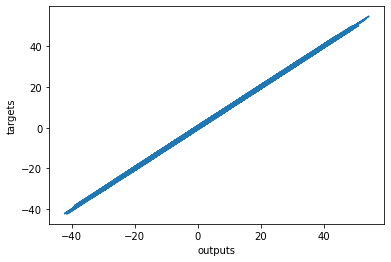

In [12]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()